In [209]:
import glob, re, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [271]:
results = []
for fname in glob.glob('*.summary'):
    #trainingset, affinity, gap, poses, receptor, astart, balanced
    fvals = re.sub('\.summary','', fname).split('_')
    if fvals[-1].startswith('h'):
        continue
    del fvals[1]
    for line in open(fname):
        vals = line.split()
        #testset, iteration, rmse, R, S
        for i in xrange(2,5):
            vals[i] = float(vals[i])
        vals = vals[:5] #throw away auc for now

        results.append(fvals+vals)

In [272]:
results = pd.DataFrame(results,columns=('trainingset','gap','poses','rec','astrat','balanced','testset','iteration','rmse','R','S'))

In [212]:
results

,trainingset,gap,poses,rec,astrat,balanced,testset,iteration,rmse,R,S
0,crystal,g1,p0,rec0,astrat1,b0,crystal,100k,1.778665,0.553451,0.559034
1,crystal,g1,p0,rec0,astrat1,b0,crystal,best25,1.720422,0.563475,0.563795
2,crystal,g1,p0,rec0,astrat1,b0,bestonly,100k,1.932352,0.486315,0.514118
3,crystal,g1,p0,rec0,astrat1,b0,bestonly,best25,1.801383,0.543609,0.556814
4,crystal,g1,p0,rec0,astrat1,b0,all_affinity,100k,2.299054,0.323415,0.364082
5,crystal,g1,p0,rec0,astrat1,b0,all_affinity,best25,2.089105,0.433870,0.459166
6,besty,g1,p1,rec1,astrat0,b1,all_pose,best100,1.842423,0.540293,0.532569
7,besty,g1,p1,rec1,astrat0,b1,all_affinity,best100,1.794654,0.543902,0.538556
8,besty,g1,p1,rec1,astrat0,b1,all_pose,best50,1.854301,0.532076,0.521222
9,besty,g1,p1,rec1,astrat0,b1,all_affinity,best50,1.810679,0.534642,0.526694


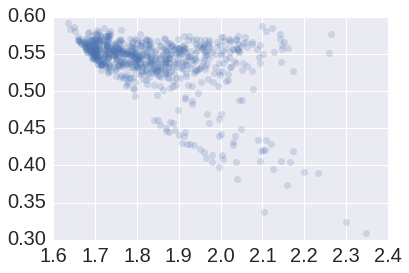

In [213]:
plt.plot(results.rmse,results.R,'o',alpha=.2)

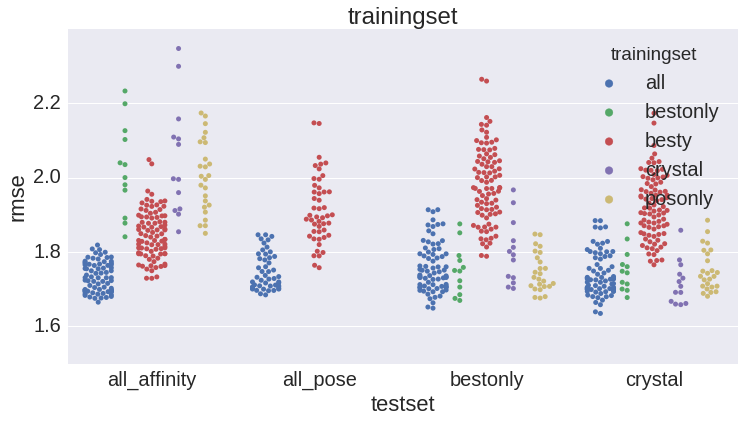

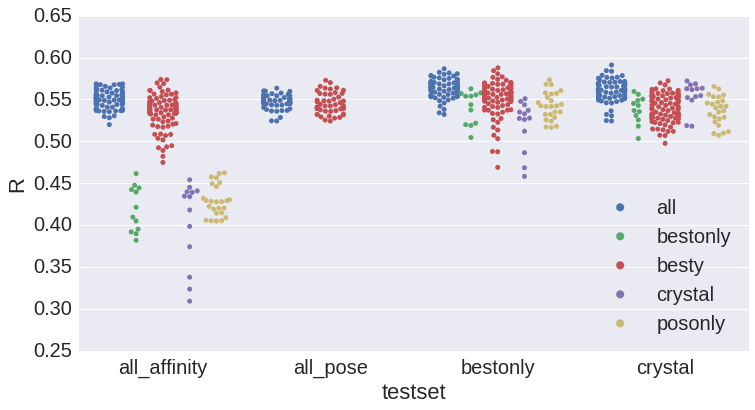

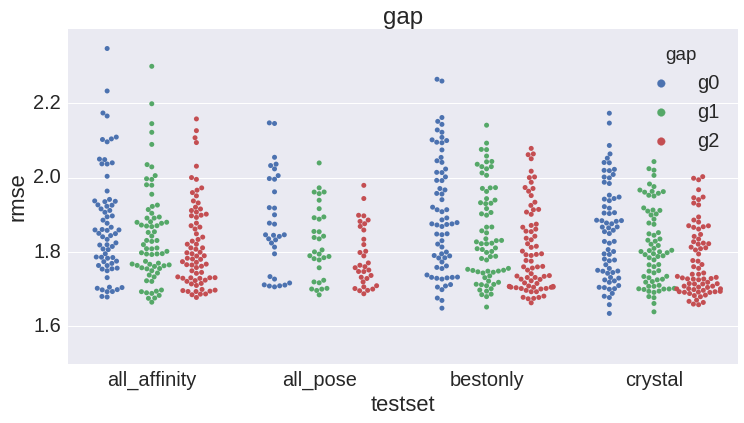

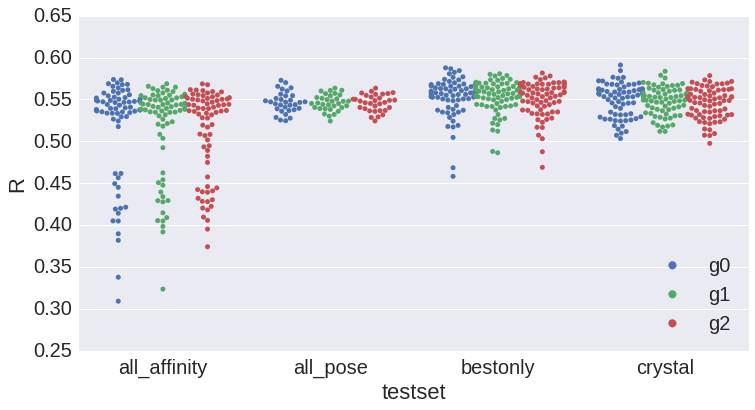

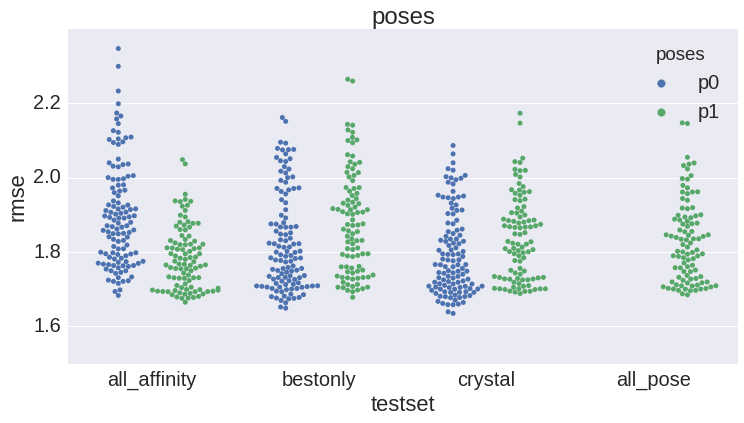

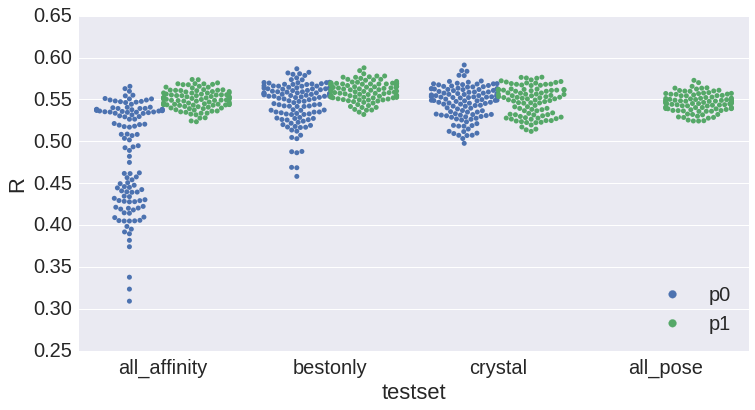

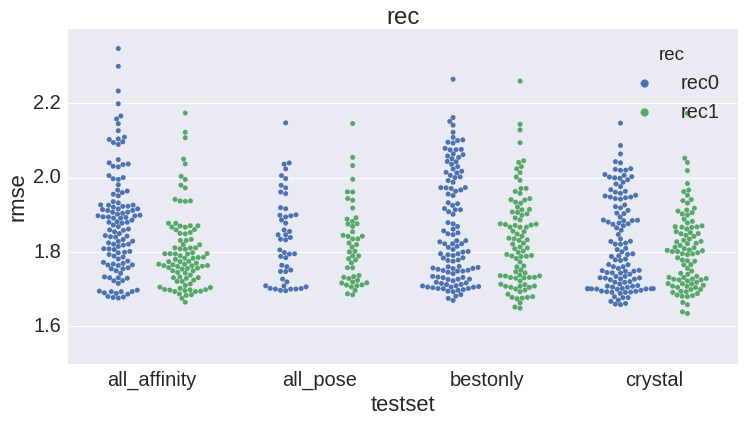

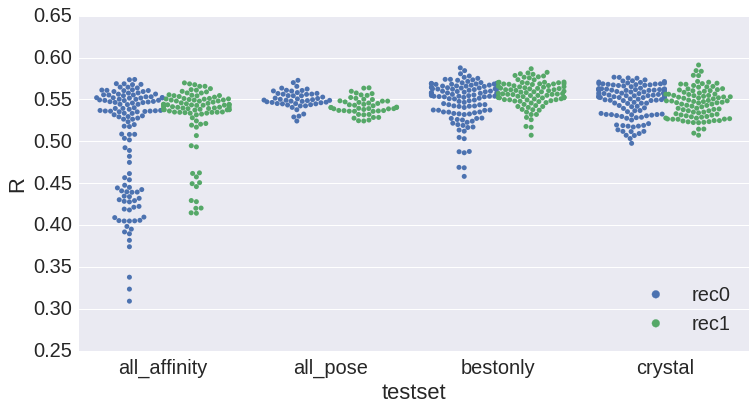

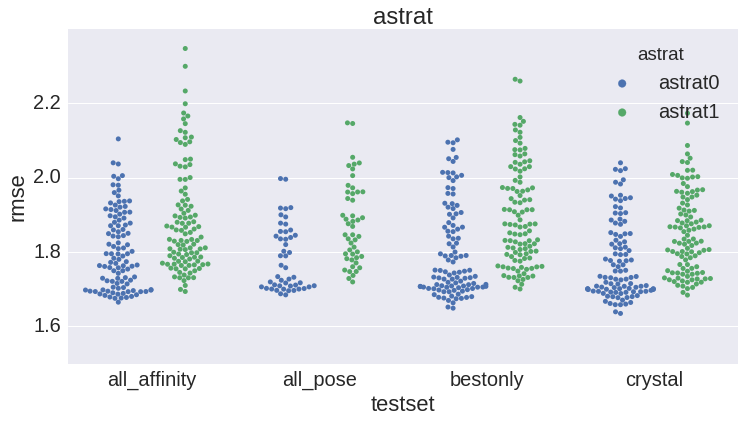

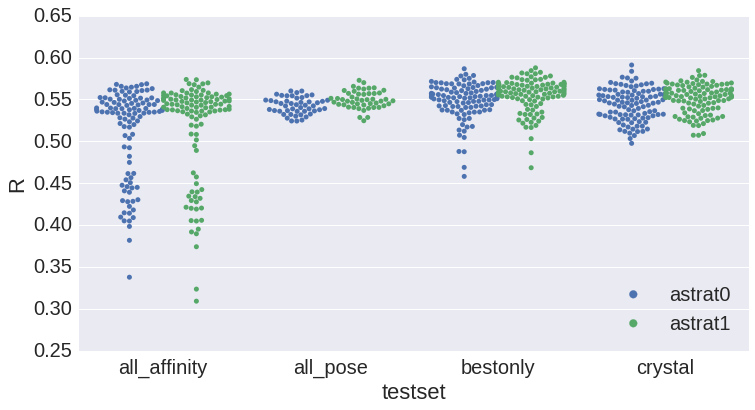

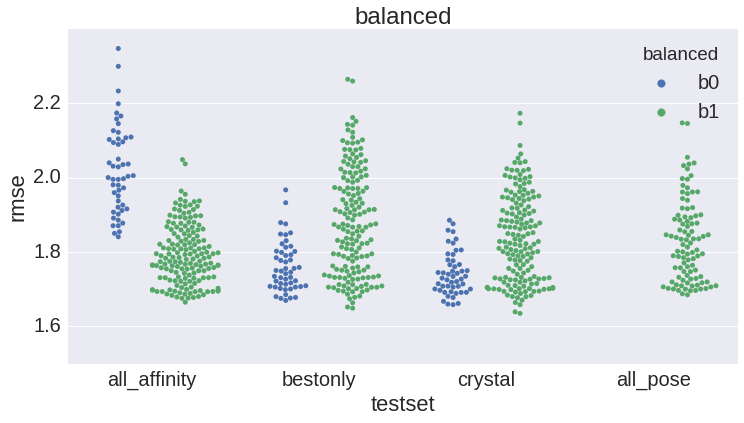

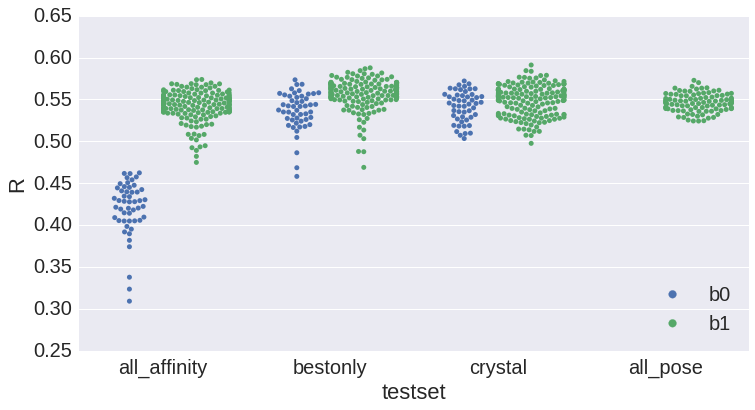

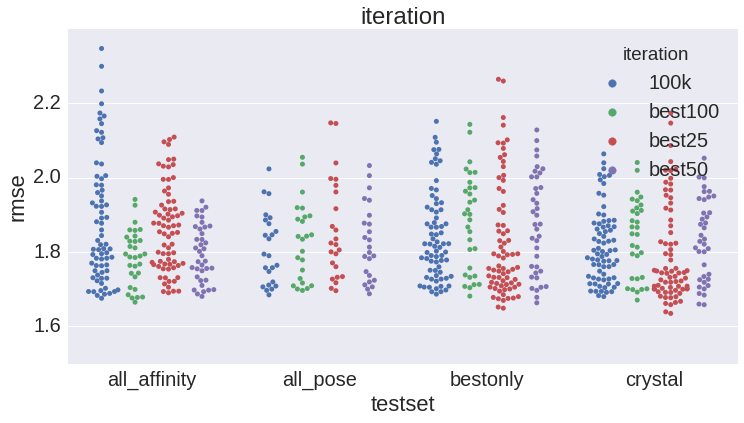

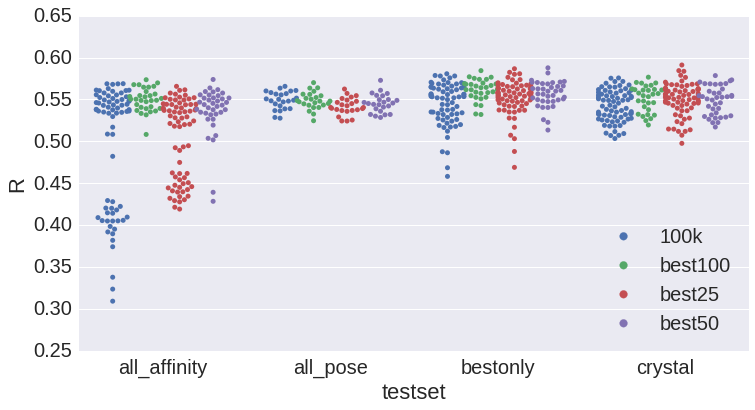

In [214]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
for X in ['trainingset','gap','poses','rec','astrat','balanced','iteration']:
    plt.figure(figsize=(12,6))
    sns.swarmplot(x='testset',y='rmse',hue=X,data=results.sort_values(by=[X,'testset']),split=True)
    plt.title(X)
    plt.figure(figsize=(12,6))
    sns.swarmplot(x='testset',y='R',hue=X,data=results.sort_values(by=[X,'testset']),split=True)
    plt.legend(loc='lower right')

In [260]:
results[(results.trainingset == 'all')& ((results.testset == 'all_affinity')|(results.testset == 'all_pose'))].sort_values(by='rmse')[:20]

,trainingset,gap,poses,rec,astrat,balanced,testset,iteration,rmse,R,S
455,all,g1,p1,rec1,astrat0,b1,all_affinity,best100,1.664972,0.565712,0.565194
459,all,g1,p1,rec1,astrat0,b1,all_affinity,100k,1.675364,0.561055,0.559558
215,all,g1,p1,rec0,astrat0,b1,all_affinity,best100,1.676154,0.564663,0.565008
313,all,g2,p1,rec0,astrat0,b1,all_affinity,best100,1.677648,0.559443,0.556681
175,all,g0,p1,rec0,astrat0,b1,all_affinity,best100,1.678815,0.567696,0.573323
177,all,g0,p1,rec0,astrat0,b1,all_affinity,best50,1.680420,0.563739,0.565284
701,all,g1,p0,rec1,astrat0,b1,all_affinity,100k,1.683178,0.562936,0.570002
458,all,g1,p1,rec1,astrat0,b1,all_pose,100k,1.684658,0.555446,0.552473
231,all,g2,p1,rec1,astrat0,b1,all_affinity,best100,1.684982,0.554546,0.550146
317,all,g2,p1,rec0,astrat0,b1,all_affinity,100k,1.686538,0.560622,0.556931


In [259]:
results[(results.trainingset == 'all')& ((results.testset == 'all_affinity')|(results.testset == 'all_pose'))].sort_values('R',ascending=False)[:20]

,trainingset,gap,poses,rec,astrat,balanced,testset,iteration,rmse,R,S
219,all,g1,p1,rec0,astrat0,b1,all_affinity,100k,1.688566,0.568719,0.570501
724,all,g2,p1,rec1,astrat1,b1,all_affinity,100k,1.693725,0.568635,0.572275
179,all,g0,p1,rec0,astrat0,b1,all_affinity,100k,1.693220,0.568017,0.575651
175,all,g0,p1,rec0,astrat0,b1,all_affinity,best100,1.678815,0.567696,0.573323
720,all,g2,p1,rec1,astrat1,b1,all_affinity,best100,1.699270,0.567613,0.571052
455,all,g1,p1,rec1,astrat0,b1,all_affinity,best100,1.664972,0.565712,0.565194
23,all,g0,p0,rec1,astrat0,b1,all_affinity,best25,1.730994,0.565675,0.574115
215,all,g1,p1,rec0,astrat0,b1,all_affinity,best100,1.676154,0.564663,0.565008
177,all,g0,p1,rec0,astrat0,b1,all_affinity,best50,1.680420,0.563739,0.565284
723,all,g2,p1,rec1,astrat1,b1,all_pose,100k,1.719381,0.563506,0.566164


In [283]:
def findpairs(results, col, val1, val2, metric):
    '''for a given column and values, find all the examples that differ only by those values and 
    return a list of tuples of the given metric for each value example'''
    ret1 = []
    ret2 = []
    names = []
    first = results[results[col] == val1]
    second = results[results[col] == val2]
    cols = list(results.columns)
    cols.remove(col)
    cols.remove('rmse')
    cols.remove('R')
    cols.remove('S')
    cols.remove('balanced') # disjoint
    combo = first.merge(second,on=cols)
    
    x = '%s_x' % metric
    y = '%s_y' % metric
    for (_,r) in combo.iterrows():
        ret1.append(r[x])
        ret2.append(r[y])
        names.append(r.values)
    
    return (np.array(ret1),np.array(ret2), names)
        

In [218]:
gap01 = findpairs(results, 'gap', 'g0','g1', 'rmse')

In [244]:
def plot_diff(results,col,val1,val2):
    '''do scatterplot between val1 and val2'''
    res = findpairs(results, col, val1, val2, 'rmse')
    plt.figure(figsize=(12,4))

    p = plt.subplot(1,2,1)
    p.plot([1,5],[1,5],'k',linewidth=1)
    p.plot(res[0],res[1],'o',alpha=.4)
    p.set_aspect('equal')
    p.set_ylim(1.5,2.5)
    p.set_xlim(1.5,2.5)
    p.set_xlabel(val1)
    p.set_ylabel(val2)
    p.set_title(col)
    
    res = findpairs(results, col, val1, val2, 'R')
    p = plt.subplot(1,2,2)
    p.plot([0.3,0.6],[0.3,0.6],'k',linewidth=1)
    p.plot(res[0],res[1],'o',alpha=.4)
    p.set_aspect('equal')
    p.set_xlabel(val1)
    #p.set_ylabel(val2)
    p.set_title(col+" R")
    
    

The y-axis is better if the points are *below* the line for RMSE and *above* the line for R.

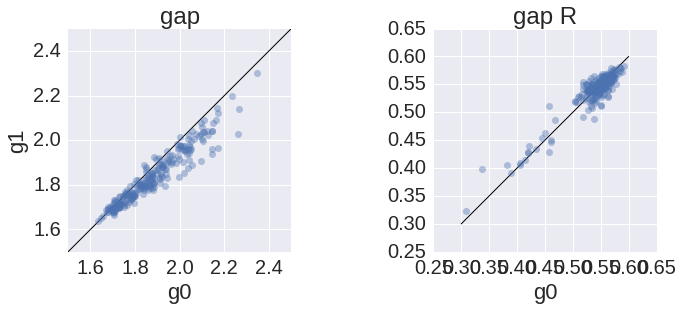

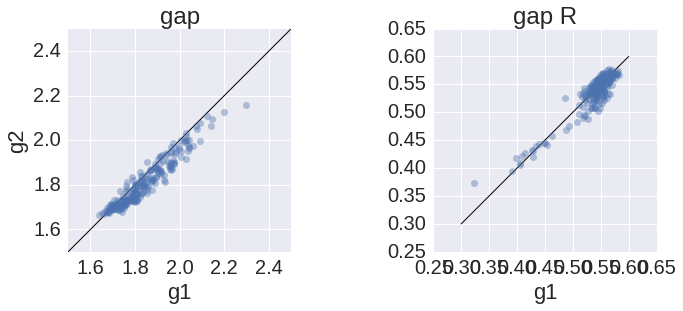

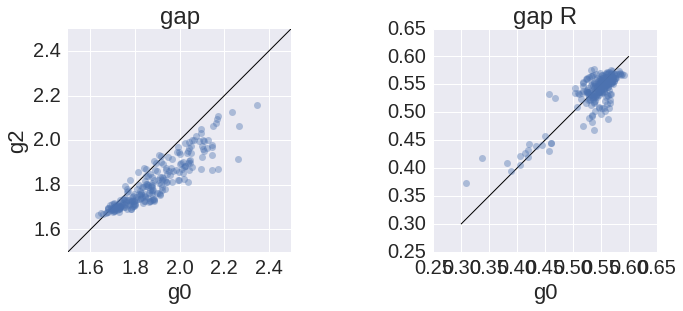

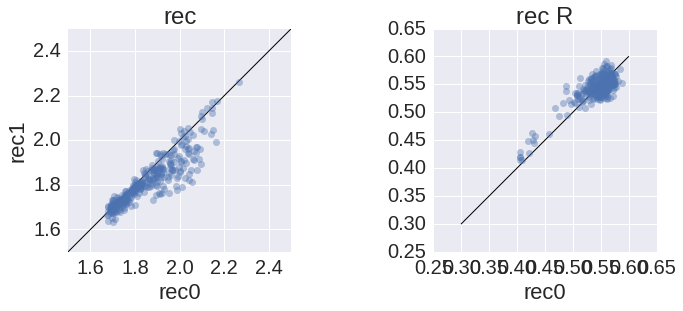

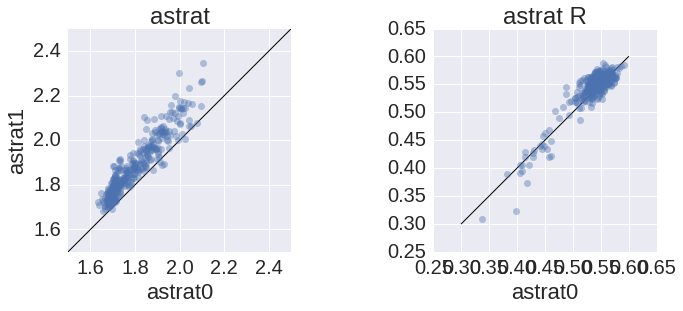

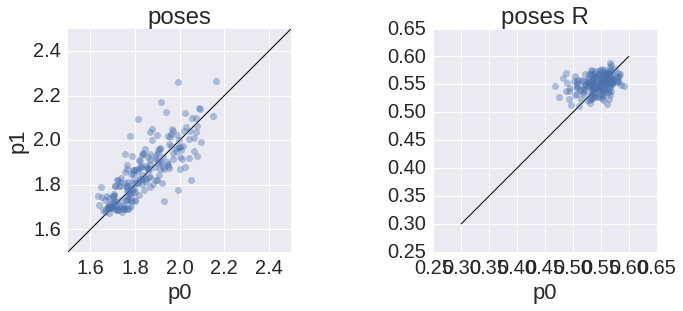

In [245]:
plot_diff(results,'gap','g0','g1')
plot_diff(results,'gap','g1','g2')
plot_diff(results,'gap','g0','g2')
plot_diff(results,'rec','rec0','rec1')
plot_diff(results,'astrat','astrat0','astrat1')
plot_diff(results,'poses','p0','p1')

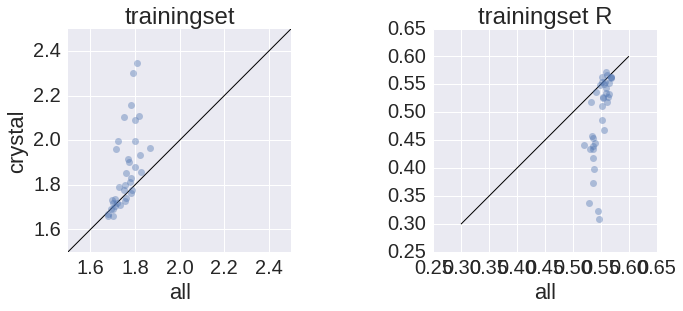

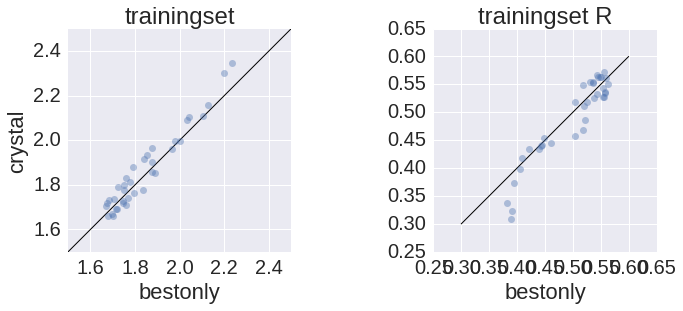

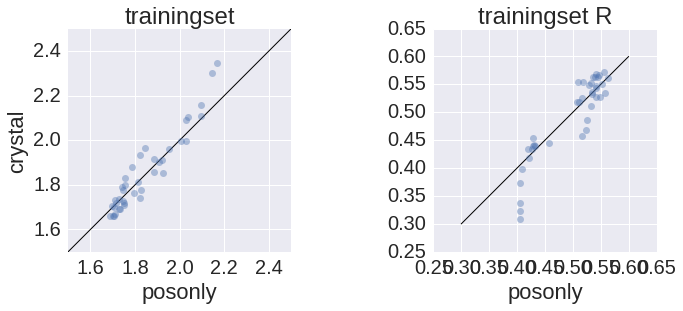

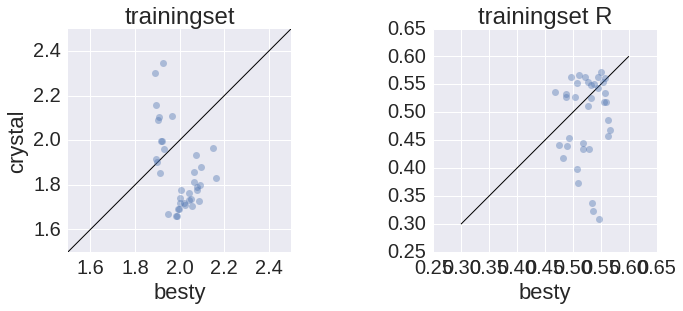

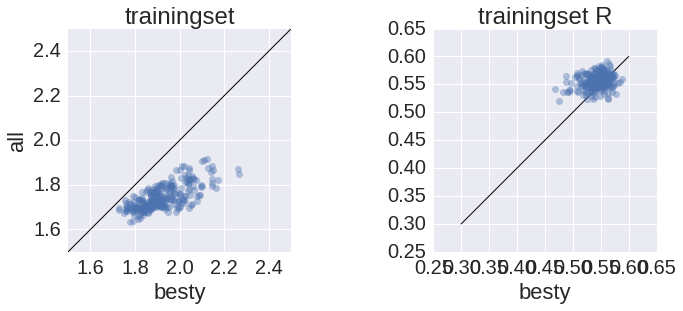

In [246]:
plot_diff(results,'trainingset','all','crystal')
plot_diff(results,'trainingset','bestonly','crystal')
plot_diff(results,'trainingset','posonly','crystal')
plot_diff(results,'trainingset','besty','crystal')
plot_diff(results,'trainingset','besty','all')

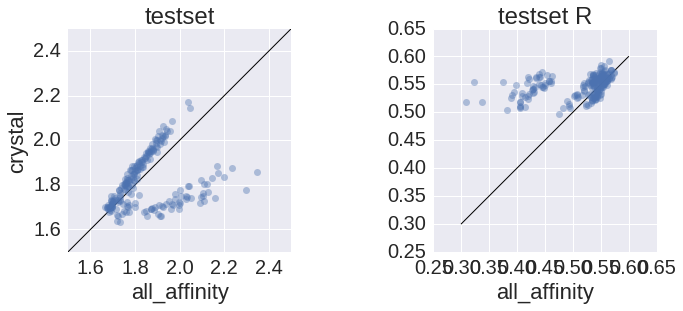

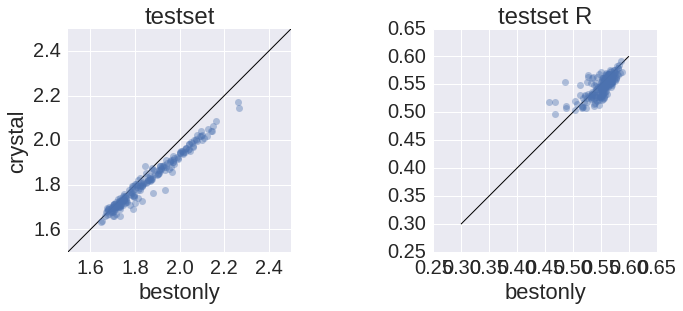

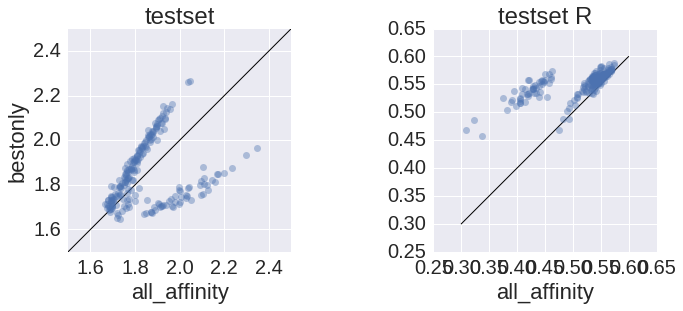

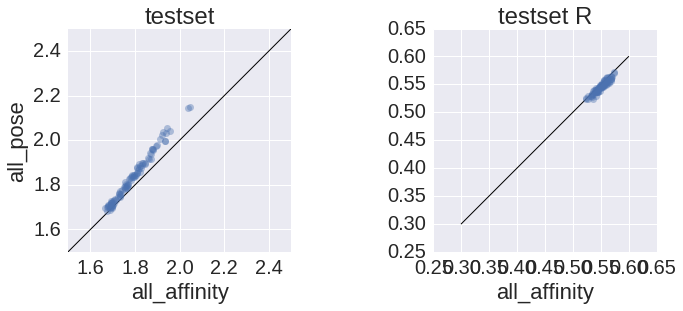

In [247]:
plot_diff(results,'testset','all_affinity','crystal')
plot_diff(results,'testset','bestonly','crystal')
plot_diff(results,'testset','all_affinity','bestonly')
plot_diff(results,'testset','all_affinity','all_pose')

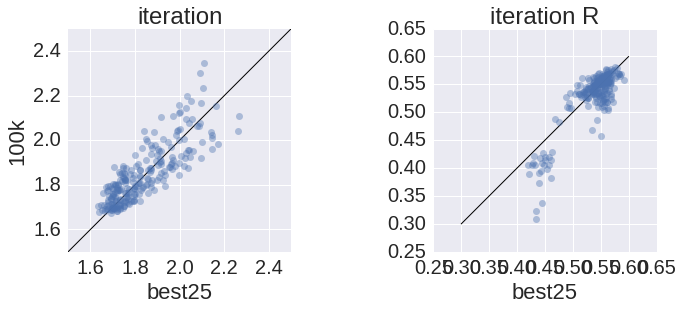

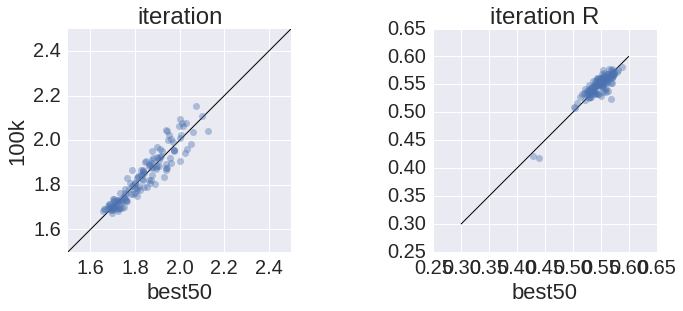

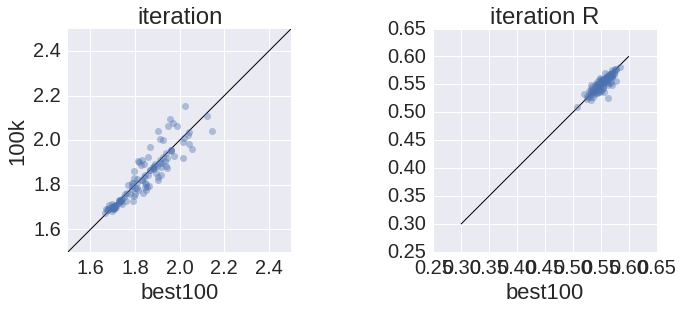

In [248]:
plot_diff(results,'iteration','best25','100k')
plot_diff(results,'iteration','best50','100k')
plot_diff(results,'iteration','best100','100k')

In [251]:
r1,r2,n = findpairs(results,'iteration','best25','100k','R')


In [256]:
sorted(zip(r1-r2,n),key=lambda x: x[0])

[(-0.044827305009000007,
  array(['besty', 'g2', 'p0', 'rec1', 'astrat1', 'b1', 'bestonly', 'best25',
         1.97060957909, 0.516793725301, 0.524254227236, 'b1', '100k',
         1.91341360345, 0.56162103031, 0.561548844223], dtype=object)),
 (-0.041582570762000004,
  array(['besty', 'g2', 'p0', 'rec1', 'astrat1', 'b1', 'crystal', 'best25',
         1.93132228415, 0.507267770321, 0.511957874123, 'b1', '100k',
         1.86153533989, 0.548850341083, 0.54747783147], dtype=object)),
 (-0.039860514726000051,
  array(['besty', 'g2', 'p0', 'rec1', 'astrat1', 'b1', 'all_affinity',
         'best25', 1.8486834218, 0.494730258524, 0.505071741348, 'b1',
         '100k', 1.79789805444, 0.53459077325, 0.539350220995], dtype=object)),
 (-0.039437966794000023,
  array(['besty', 'g1', 'p0', 'rec0', 'astrat0', 'b1', 'bestonly', 'best25',
         2.04328570334, 0.487863954505, 0.51510927917, 'b1', '100k',
         2.07566946857, 0.527301921299, 0.539318037525], dtype=object)),
 (-0.03588014850999998

Analyze huber effect

In [265]:
hresults = []
for fname in glob.glob('*h*.summary'):
    #trainingset, affinity, gap, poses, receptor, astart, balanced
    fvals = re.sub('\.summary','', fname).split('_')
    del fvals[1]
    for line in open(fname):
        vals = line.split()
        #testset, iteration, rmse, R, S
        for i in xrange(2,5):
            vals[i] = float(vals[i])
        vals = vals[:5] #throw away auc for now

        hresults.append(fvals+vals)

In [267]:
hresults = pd.DataFrame(hresults,columns=('trainingset','gap','poses','rec','astrat','balanced','h','testset','iteration','rmse','R','S'))

In [273]:
results['h'] = 'h0'

In [287]:
results= results.append(hresults)

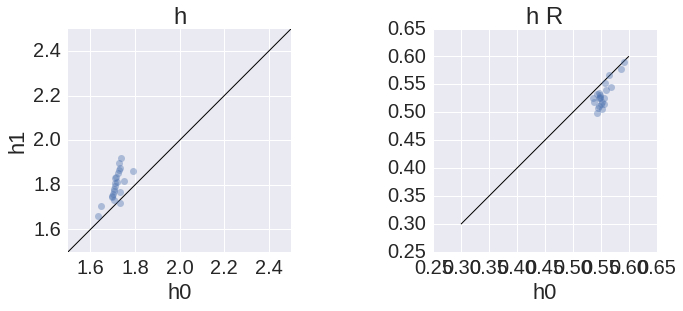

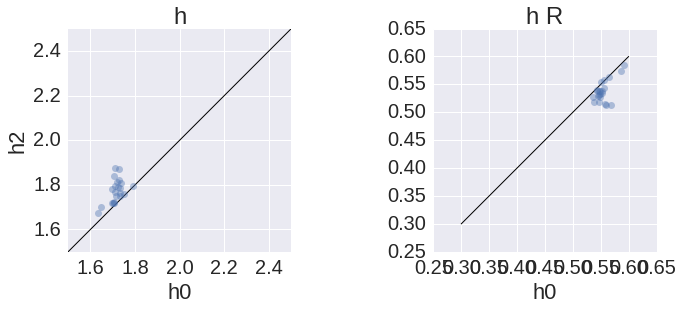

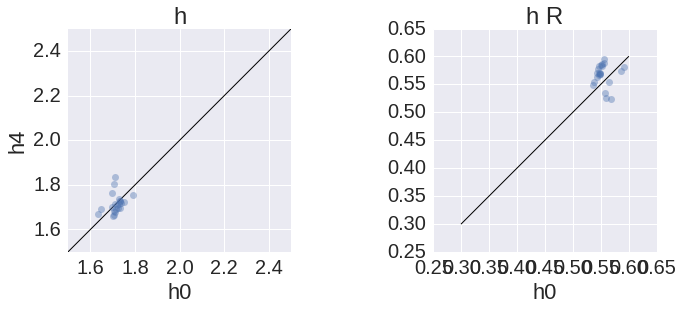

In [289]:
plot_diff(results,'h','h0','h1')
plot_diff(results,'h','h0','h2')
plot_diff(results,'h','h0','h4')


In [290]:
results[(results.h == 'h4')].sort_values('R',ascending=False)[:20]

,R,S,astrat,balanced,gap,h,iteration,poses,rec,rmse,testset,trainingset
37,0.595922,0.594040,astrat0,b1,g0,h4,100k,p1,rec1,1.660451,all_affinity,all
46,0.588933,0.586186,astrat0,b1,g0,h4,100k,p1,rec1,1.716205,bestonly,all
42,0.586216,0.584941,astrat0,b1,g0,h4,100k,p1,rec1,1.694457,crystal,all
33,0.585159,0.586681,astrat0,b1,g0,h4,best100,p1,rec1,1.665959,all_affinity,all
36,0.582585,0.579592,astrat0,b1,g0,h4,100k,p1,rec1,1.677509,all_pose,all
44,0.582514,0.582641,astrat0,b1,g0,h4,best100,p1,rec1,1.718773,bestonly,all
63,0.581221,0.589387,astrat0,b1,g0,h4,best25,p0,rec1,1.669641,crystal,all
40,0.577732,0.578368,astrat0,b1,g0,h4,best100,p1,rec1,1.698051,crystal,all
65,0.573184,0.580190,astrat0,b1,g0,h4,best25,p0,rec1,1.692281,bestonly,all
47,0.571295,0.570681,astrat0,b1,g0,h4,best25,p1,rec1,1.754657,bestonly,all


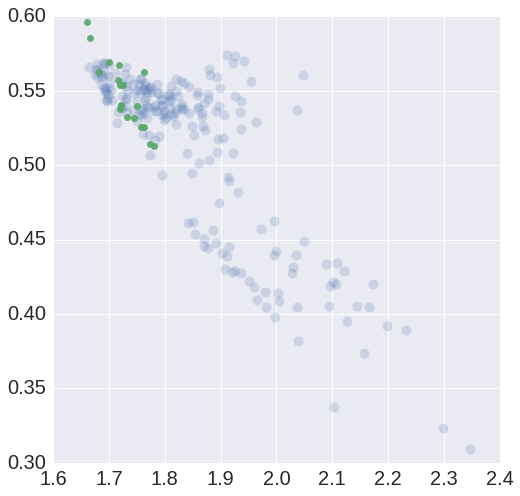

In [309]:
plt.figure(figsize=(8,8))
aresults = results[results.testset == 'all_affinity']
plt.plot(aresults[aresults.h == 'h0'].rmse,aresults[aresults.h == 'h0'].R,'o',alpha=.2,markersize=10)
plt.plot(aresults[aresults.h != 'h0'].rmse,aresults[aresults.h != 'h0'].R,'o',alpha=.9)